In [1]:
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [5]:
resistance = pd.read_csv('dataGatheringOutput.csv',sep=',')

In [6]:
resistance.head()

,player,sabotagedRatio,notSabotagedRatio,failedRatio,inTeamSabotagedRatio,leaderSabotagedRatio,isSpy
0,0,1.000000,0.0,0.6,0.00,0.0,1
1,1,0.666667,0.5,0.0,0.50,0.5,0
2,2,0.666667,1.0,0.4,0.25,-1.0,0
3,3,0.666667,1.0,0.6,0.00,0.0,1
4,4,0.000000,1.0,0.0,0.50,1.0,1


In [7]:
resistance.isnull().sum()

player                  0
sabotagedRatio          0
notSabotagedRatio       0
failedRatio             0
inTeamSabotagedRatio    0
leaderSabotagedRatio    0
isSpy                   0
dtype: int64

In [8]:
resistance['isSpy'].value_counts()

0    878
1    574
Name: isSpy, dtype: int64

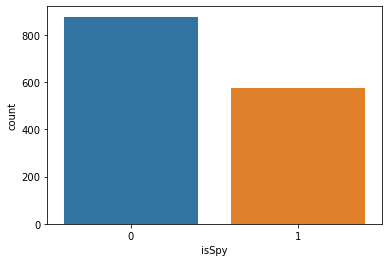

In [9]:
sns.countplot(resistance['isSpy'])

In [10]:
X = resistance.drop('isSpy', axis=1)
y = resistance['isSpy']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 93)

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train[:10]

array([[ 0.43263576,  0.70317012,  0.8731006 , -1.20592504, -2.24293194,
        -1.20968645],
       [-1.27389919, -0.46100886,  0.8731006 , -1.20592504,  0.27554673,
         1.43314742],
       [-1.55832168, -2.78936683,  0.8731006 , -1.20592504,  1.53478606,
         1.43314742],
       [-0.7050542 ,  0.70317012,  0.8731006 ,  0.12691279,  0.27554673,
         0.11173049],
       [ 1.28590324, -0.16996412,  0.8731006 , -1.20592504,  0.59035656,
         0.11173049],
       [ 1.57032573,  0.12108063, -0.31294051,  1.12654117,  1.53478606,
        -1.20968645],
       [ 1.57032573,  0.70317012,  0.8731006 ,  0.62672698,  1.53478606,
        -1.20968645],
       [-1.27389919,  0.70317012, -0.31294051,  0.12691279, -0.35407294,
         0.11173049],
       [-1.55832168,  0.12108063,  0.8731006 , -1.20592504,  0.59035656,
         0.11173049],
       [-0.7050542 ,  0.12108063, -1.49898162,  1.45975062, -0.35407294,
        -1.20968645]])

# Random Forest Classifier

In [14]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [15]:
X_test[:20]

array([[-0.42063171,  0.70317012,  0.47775357,  0.39348036,  1.53478606,
         1.43314742],
       [-0.7050542 ,  0.12108063,  0.8731006 , -1.20592504, -0.35407294,
         0.11173049],
       [-1.55832168,  0.70317012,  0.8731006 , -1.20592504,  0.27554673,
         1.43314742],
       [ 0.43263576,  0.70317012,  0.8731006 ,  1.45975062,  1.53478606,
         1.43314742],
       [ 1.57032573,  0.70317012, -1.49898162, -1.20592504, -2.24293194,
        -1.20968645],
       [-1.55832168,  0.70317012, -0.31294051,  0.92661549, -0.35407294,
         0.11173049],
       [ 1.57032573, -0.46100886, -1.49898162, -1.20592504, -0.35407294,
         0.11173049],
       [ 1.57032573, -2.78936683,  0.08240653, -1.20592504, -2.24293194,
         1.43314742],
       [-0.7050542 , -0.46100886,  0.8731006 ,  0.66004792, -0.35407294,
         0.11173049],
       [-0.13620922, -1.04309835, -0.31294051, -1.20592504, -0.35407294,
        -1.20968645],
       [-1.27389919, -2.78936683,  0.08240653,  0.

In [16]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       153
           1       0.77      0.62      0.69       138

    accuracy                           0.73       291
   macro avg       0.74      0.73      0.73       291
weighted avg       0.74      0.73      0.73       291



In [17]:
print(confusion_matrix(y_test, pred_rfc))

[[128  25]
 [ 53  85]]


# SVM Classifier

In [18]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [19]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       153
           1       0.78      0.60      0.68       138

    accuracy                           0.73       291
   macro avg       0.74      0.73      0.72       291
weighted avg       0.74      0.73      0.73       291

[[130  23]
 [ 55  83]]


# Neural Network

In [20]:
mlpc = MLPClassifier(hidden_layer_sizes=(5,5,5),max_iter=200)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

C:\Users\overpowered\Downloads\winpython\WPy64-3741\python-3.7.4.amd64\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71       153
           1       0.68      0.59      0.64       138

    accuracy                           0.68       291
   macro avg       0.68      0.67      0.67       291
weighted avg       0.68      0.68      0.67       291

[[115  38]
 [ 56  82]]


In [22]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.7319587628865979

In [23]:
resistance.head(10)

,player,sabotagedRatio,notSabotagedRatio,failedRatio,inTeamSabotagedRatio,leaderSabotagedRatio,isSpy
0,0,1.000000,0.0,0.6,0.000000,0.0,1
1,1,0.666667,0.5,0.0,0.500000,0.5,0
2,2,0.666667,1.0,0.4,0.250000,-1.0,0
3,3,0.666667,1.0,0.6,0.000000,0.0,1
4,4,0.000000,1.0,0.0,0.500000,1.0,1
5,5,0.000000,0.0,0.0,-1.000000,-1.0,0
6,6,1.000000,1.0,1.0,0.000000,-1.0,1
7,7,1.000000,1.0,1.0,-1.000000,0.0,0
8,6,1.000000,1.0,-1.0,0.666667,1.0,0
9,7,1.000000,1.0,-1.0,0.000000,0.0,1


In [24]:
Xnew = [[5,0.75,0.5,0.33,0,1]]
Xnew = sc.transform(Xnew)

In [25]:
ynew = rfc.predict(Xnew)
ynew

array([1], dtype=int64)

In [26]:
import pickle
pickle_path = 'rfc_pickle.pkl'
rfc_pickle = open(pickle_path, 'wb')
pickle.dump(rfc, rfc_pickle)
rfc_pickle.close()

In [27]:
sc_pickle = open('sc_pickle.pkl', 'wb')
pickle.dump(sc, sc_pickle)
sc_pickle.close()